# Introduction

Google colab環境で簡単に実行したい場合は以下をクリック↓

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/10_Bode/bode.ipynb)

## 制御モジュールのインストール

In [1]:
! pip install control

## モジュールの読み込み

In [2]:
from pylab import *
import math
import cmath
import numpy as np
import pandas as pd
import control
import control.matlab as matlab
import matplotlib.pyplot as plt
%matplotlib inline

## 複素数の定義

In [3]:
s = matlab.TransferFunction.s

## 1次系のボード線図

\begin{align}
G(s)=\frac{1}{Ts+1}
\end{align}
where $T=10$

array([0.99995   , 0.99503719, 0.89442719, 0.70710678, 0.09950372,
       0.0099995 ])

array([-0.00999967, -0.09966865, -0.46364761, -0.78539816, -1.47112767,
       -1.56079666])

array([1.e-03, 1.e-02, 5.e-02, 1.e-01, 1.e+00, 1.e+01])

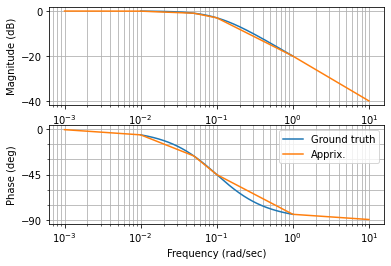

In [4]:
import control
G = 1/(10*s+1)
control.bode(G, dB=True, label='Ground truth')
mag, phase, omega = control.bode(G, omega=[0.001, 0.01, 0.05, 0.1, 1.0, 10.0], 
                                 dB=True, label='Apprix.')
plt.legend()
display(mag, phase, omega)

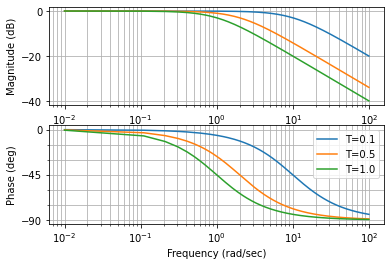

In [5]:
import control
for T in [0.1, 0.5, 1.0]:
    G = 1/(T*s+1)
    control.bode(G, omega=np.linspace(0.01, 100, 1000), 
                 dB=True, label='T='+str(round(T, 2)))
plt.legend()

## 2次系のボード線図

\begin{align}
G(s)=s^2 + 2\zeta\omega_{n}s+\omega_n^2
\end{align}

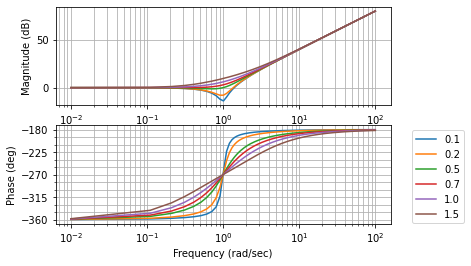

In [6]:
omega_n = 1.0
for zeta in [0.1, 0.2, 0.5, 0.7, 1.0, 1.5]:
    G = s*s +2*zeta*omega_n*s + omega_n*omega_n
    control.bode(G, omega=np.linspace(0.01, 100, 1000), 
                 label=round(zeta, 2), dB=True)
plt.legend(bbox_to_anchor=(1.05, 1))

\begin{align}
G(s)=\frac{1}{s^2 + 2\zeta\omega_{n}s+\omega_n^2}
\end{align}

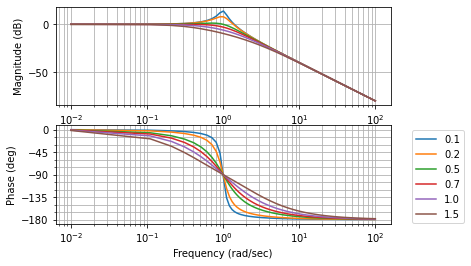

In [7]:
omega_n = 1.0
for zeta in [0.1, 0.2, 0.5, 0.7, 1.0, 1.5]:
    G = 1/(s*s +2*zeta*omega_n*s + omega_n*omega_n)
    control.bode(G, omega=np.linspace(0.01, 100, 1000), 
                 label=round(zeta, 2), dB=True)
plt.legend(bbox_to_anchor=(1.05, 1))

## Bode plos for Ratio of First-Order Factors

In [8]:
K = 1
G_origin = (K*(s+3)) / (s*(s+1)*(s+2))
G_origin

TransferFunction(array([1, 3]), array([1, 3, 2, 0]))

In [9]:
G = (3/2 * K*(s/3 +1)) / (s*(s+1)*(s/2 +1))
G

TransferFunction(array([3., 9.]), array([3, 9, 6, 0]))

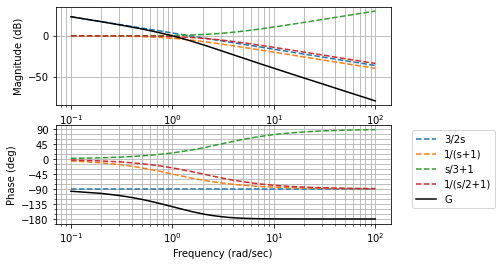

In [10]:
omega_list = np.linspace(0.1, 100, 1000)
control.bode(3/(2*s), omega_list, label='3/2s', linestyle='--', dB=True, wrap_phase=True)
control.bode(1/(s+1), omega_list, label='1/(s+1)', linestyle='--', dB=True, wrap_phase=True)
control.bode(s/3 +1, omega_list, label='s/3+1', linestyle='--', dB=True, wrap_phase=True)
control.bode(1/(s/2+ 1), omega_list, label='1/(s/2+1)', linestyle='--', dB=True, wrap_phase=True)
control.bode(G, omega_list, label='G', color='black', dB=True, wrap_phase=True)
plt.legend(bbox_to_anchor=(1.05, 1))

## ゲイン余裕，位相余裕

In [11]:
G = 12/ (s**3 + 6*s**2 + 10*s +6)
G

TransferFunction(array([12]), array([ 1,  6, 10,  6]))

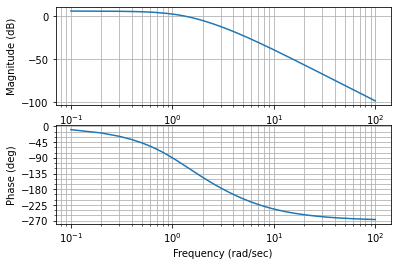

In [12]:
omega_list = np.linspace(0.1, 100, 1000)
mag, phase, omega =control.bode(G, omega_list, dB=True)

In [13]:
gm, pm, sm, wgc, wpc, wsc = control.stability_margins(G)
print("Gain margin: {} at {}".format(round(gm, 2), round(wgc, 2)))
print("Phase margin: {} at {}".format(round(pm, 2), round(wpc, 2)))
print("Stability margin: {} at {}".format(round(sm, 2), round(wsc, 2)))

Gain margin: 4.5 at 3.16
Phase margin: 66.45 at 1.34
Stability margin: 0.61 at 2.11


,mag,phase
omega,,
3.162162,-13.063545,-179.997549


13.06

,mag,phase
omega,,
1.342342,-0.00758,-113.615176


66.38

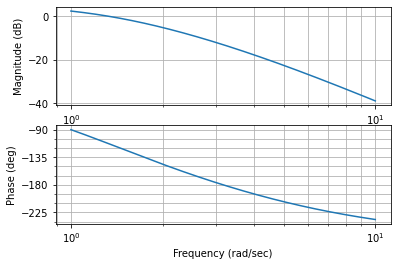

In [14]:
omega_list = np.linspace(1, 10, 1000)
mag, phase, omega =control.bode(G, omega_list, dB=True)

phase = np.rad2deg(phase)
mag = list(map(lambda n: 20*math.log10(n), mag))
df = pd.DataFrame(np.array([mag, phase]).T, index=omega, columns=['mag', 'phase'])
df.index.name = 'omega'

display(
df[(df.phase >= -180.01) & (df.phase <= -179.99)],
round(-1*df[(df.phase >= -180.01) & (df.phase <= -179.99)].mag.values[0], 2),
df[(df.mag >= -0.01) & (df.mag <= 0.01)],
round(180+df[(df.mag >= -0.01) & (df.mag <= 0.01)].phase.values[0], 2)
)

## 安定性の議論

In [15]:
K = 40
G = K / ((s+2)*(s+4)*(s+5))
G

TransferFunction(array([40]), array([ 1, 11, 38, 40]))

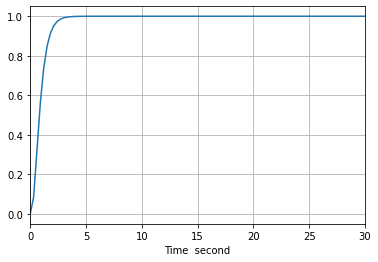

In [16]:
T_MIN = 0
T_MAX = 30
yout, trange = matlab.step(G, np.linspace(T_MIN, T_MAX, 100))

plt.plot(trange, yout)
plt.xlabel('Time  second')
plt.xlim(T_MIN, T_MAX)
plt.grid()
plt.show()

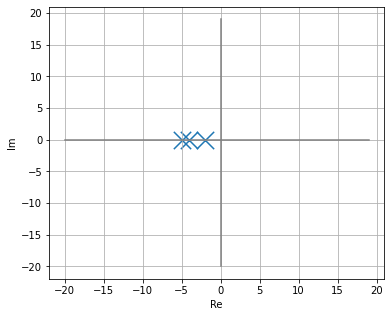

In [17]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.arange(-20, 20), [0]*len(np.arange(-20, 20)), color='gray')
plt.plot([0]*len(np.arange(-20, 20)), np.arange(-20, 20), color='gray')

plt.scatter(matlab.pole(G).real, matlab.pole(G).imag, 
            marker='x', s=300)
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
plt.show()

In [18]:
def make_df(rlist, klist):
    df = pd.DataFrame(rlist, index=klist)
    df.index.name = 'K'
    df.columns = list(map(lambda i: f'Pole-{i}' , np.arange(1, len(rlist[0])+1)))
    return df

def visualize_root_locus(df, file_name):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(1, 1, 1)
    for i, col in enumerate(df.columns.tolist()):
        plt.plot(df.iloc[0, i].real, df.iloc[0, i].imag,
                 marker='x', color='black', markersize=10)
        plt.plot(df.iloc[:, i].to_numpy().real, df.iloc[:, i].to_numpy().imag, '--',
                 label=r'{} $\sigma=${}'.format(col, round(df.iloc[0, i].real,2)))
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.legend(framealpha=0.1)
    plt.show()

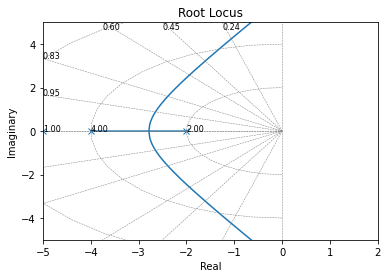

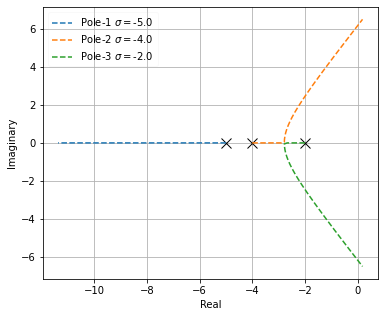

In [19]:
rlist, klist = \
matlab.rlocus(G, 
              xlim=[-5, 2], ylim=[-5, 5],
              kvect=np.arange(0, 1e+1+1, 1e-3), # List of gains
              grid=True,
            )

visualize_root_locus(make_df(rlist, klist), 'Example1')

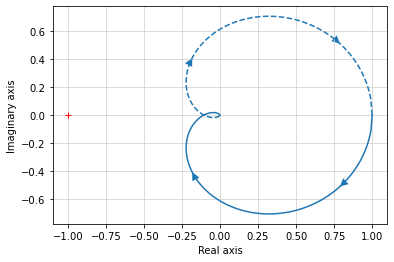

In [20]:
matlab.nyquist(G)
plt.show()

Gain margin: 9.45 at 6.16
Phase margin: inf at nan
Stability margin: 0.8 at 3.78


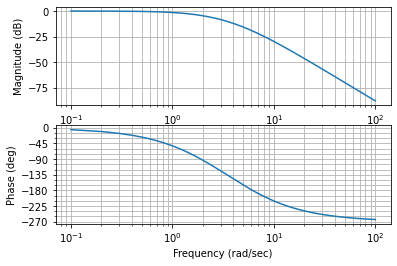

In [21]:
omega_list = np.linspace(0.1, 100, 1000)
mag, phase, omega =control.bode(G, omega_list, dB=True)

gm, pm, sm, wgc, wpc, wsc = control.stability_margins(G)
print("Gain margin: {} at {}".format(round(gm, 2), round(wgc, 2)))
print("Phase margin: {} at {}".format(round(pm, 2), round(wpc, 2)))
print("Stability margin: {} at {}".format(round(sm, 2), round(wsc, 2)))

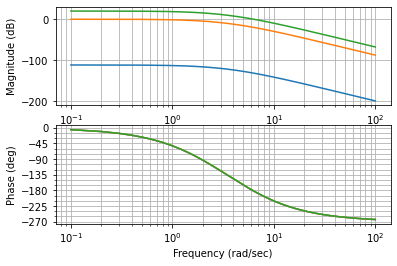

In [22]:
G_max = 400 / ((s+2)*(s+4)*(s+5))
G_min = 1e-4 / ((s+2)*(s+4)*(s+5))
omega_list = np.linspace(0.1, 100, 1000)
mag, phase, omega =control.bode([G_min, G, G_max], omega_list, dB=True)